# EDAandModel 

# EDAandModel : STAT Project- Group 17: Exploring Crime Trends with Machine Learning 

##### Authors: Andy Zuo, Lia Yang, Helen Tan

In [37]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV

from tools import utils

## Exploratory Data Analysis(EDA)

### Data Cleaning - add more data cleaning

In [38]:
crime_data = pd.read_csv('data/crime.csv')

In [39]:
crime_data.shape

(1954, 53)

In [40]:
crime_data.describe()

,person_id,sex,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,p_felprop_viol,p_murder,...,drug_two_year,property_two_year,misdemeanor_two_year,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,3260.150461,0.871546,31.971853,23.956499,11.228762,0.351586,0.967247,0.112590,0.996929,0.017400,...,0.093142,0.089560,0.272262,0.176049,0.209826,0.039918,0.050154,0.125384,0.089048,0.084442
std,1900.758354,0.334681,11.008898,8.868941,11.223027,0.477588,1.481047,0.708095,2.217787,0.174411,...,0.290706,0.285623,0.445238,0.380959,0.407289,0.195817,0.218318,0.331238,0.284886,0.278121
min,4.000000,0.000000,18.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1576.250000,1.000000,23.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3291.000000,1.000000,29.000000,20.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4952.500000,1.000000,39.000000,27.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6468.000000,1.000000,69.000000,60.000000,218.000000,1.000000,16.000000,14.000000,29.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
crime_data.head()

,person_id,screening_date,sex,race,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,...,drug_two_year,property_two_year,misdemeanor_two_year,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month
0,1001,2014-02-03,1,African-American,45,19,39,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1,101,2013-01-13,1,Hispanic,42,26,9,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,101,2014-02-02,1,Hispanic,43,26,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1015,2014-01-22,1,African-American,35,19,47,1,3,0,...,0,0,0,0,0,0,0,0,0,0
4,1016,2013-04-15,1,Other,27,18,11,1,2,0,...,0,0,0,1,1,0,0,0,1,1


In [42]:
crime_data.isnull().sum()

person_id                0
screening_date           0
sex                      0
race                     0
age_at_current_charge    0
age_at_first_charge      0
p_charges                0
p_incarceration          0
p_probation              0
p_juv_fel_count          0
p_felprop_viol           0
p_murder                 0
p_felassault             0
p_misdeassault           0
p_famviol                0
p_sex_offense            0
p_weapon                 0
p_fta_two_year           0
p_fta_two_year_plus      0
current_violence         0
current_violence20       0
p_pending_charge         0
p_felony                 0
p_misdemeanor            0
p_violence               0
total_convictions        0
p_arrest                 0
p_property               0
p_traffic                0
p_drug                   0
p_dui                    0
p_domestic               0
p_stalking               0
p_voyeurism              0
p_fraud                  0
p_stealing               0
p_trespass               0
s

In [43]:
crime_data.dtypes

person_id                 int64
screening_date           object
sex                       int64
race                     object
age_at_current_charge     int64
age_at_first_charge       int64
p_charges                 int64
p_incarceration           int64
p_probation               int64
p_juv_fel_count           int64
p_felprop_viol            int64
p_murder                  int64
p_felassault              int64
p_misdeassault            int64
p_famviol                 int64
p_sex_offense             int64
p_weapon                  int64
p_fta_two_year            int64
p_fta_two_year_plus       int64
current_violence          int64
current_violence20        int64
p_pending_charge          int64
p_felony                  int64
p_misdemeanor             int64
p_violence                int64
total_convictions         int64
p_arrest                  int64
p_property                int64
p_traffic                 int64
p_drug                    int64
p_dui                     int64
p_domest

### Data visualization - Add more visualizations based on the two assumption at Main.ipynb and add description for each visualization such as purpose and the visualization anaylysis, and findings.

In [44]:
crime_data = crime_data.drop('p_famviol', axis = 1)
correlation = crime_data.corr().round(2)
print(correlation['total_convictions'].sort_values(ascending = False),'\n')

total_convictions        1.00
p_misdemeanor            0.89
p_arrest                 0.89
p_pending_charge         0.86
p_charges                0.83
p_felony                 0.81
p_probation              0.64
p_drug                   0.62
p_violence               0.59
p_property               0.54
p_stealing               0.49
p_felprop_viol           0.47
p_trespass               0.42
p_incarceration          0.37
p_traffic                0.33
p_felassault             0.28
age_at_current_charge    0.23
p_juv_fel_count          0.21
p_weapon                 0.19
felony_two_year          0.16
general_two_year         0.15
one_year                 0.12
violent_two_year         0.12
three_year               0.12
p_misdeassault           0.12
p_dui                    0.11
general_six_month        0.11
property_two_year        0.10
five_year                0.09
sex                      0.09
drug_two_year            0.08
felony_six_month         0.08
six_month                0.08
property_s

/tmp/ipykernel_2819/2983602702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = crime_data.corr().round(2)


### Heatmap and Histogram - Age and Crime

We used heatmap to show the relationship between two or more variables and to reduce redundancy, such as the relationship between age and the likelihood of committing a crime. 

We found that age is indeed a factor in criminal behavior, as older people tend to have more convictions and pending charges, and tend to commit their first crime at an older age. However, it's important to keep in mind that correlation does not necessarily imply causal relationships, and further analysis is needed to determine the nature of these relationships.

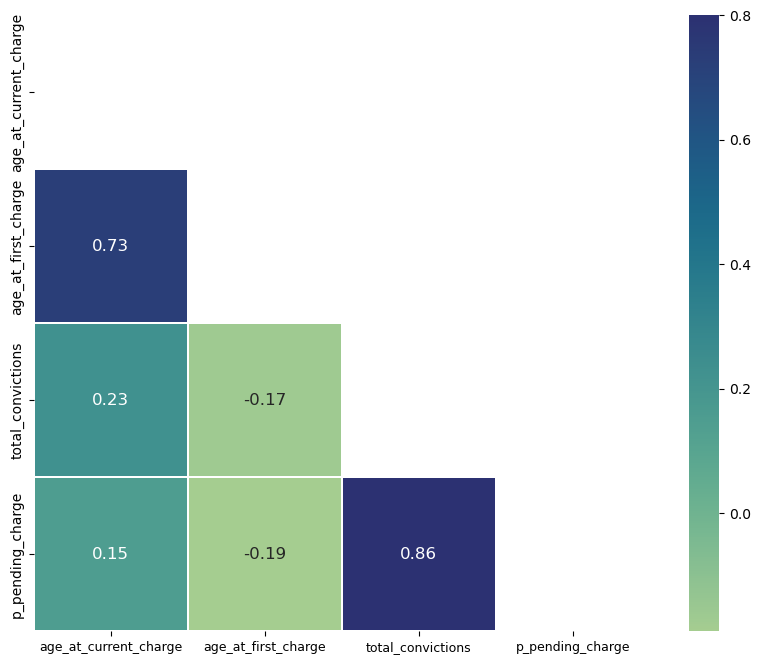

In [45]:
columns = ["age_at_current_charge", "age_at_first_charge", "total_convictions", "p_pending_charge"]
correlation_coefs = np.corrcoef(crime_data[columns].values.T)
mask = np.triu(np.ones((4,4)))
f, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(correlation_coefs.round(2), mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='crest',
            linecolor="white", xticklabels=columns, annot_kws={'size': 12}, yticklabels=columns)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=9)
plt.savefig('figures/heatmap1')
plt.show()

We use histograms to see the overall pattern and distribution of a variable, as well as identify any outliers or unusual values. 

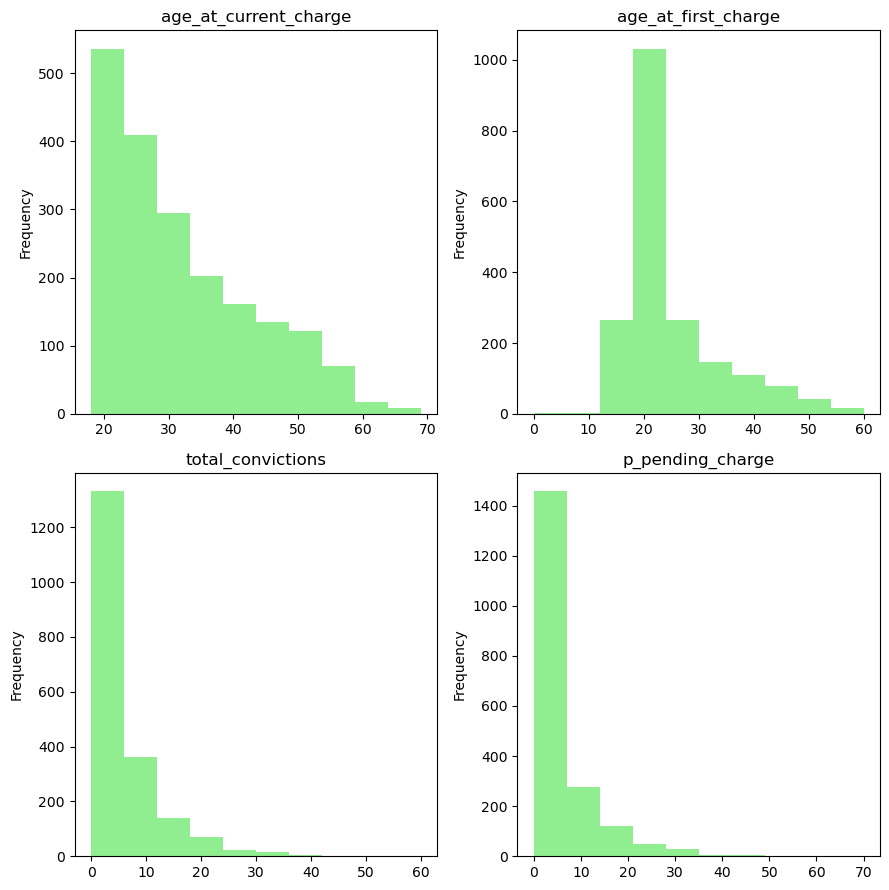

In [46]:
fig, axes = plt.subplots(figsize=(9,9), ncols=2, nrows=2)

hist_features1 = ["age_at_current_charge", "age_at_first_charge", "total_convictions", "p_pending_charge"]

for k, feature in enumerate(hist_features1):
    axes[k//2, k%2].set_title(feature)
    crime_data[feature].plot(kind="hist", ax=axes[k//2, k%2], color = 'lightgreen')
plt.tight_layout()
plt.savefig('figures/histogram1.png')
plt.show()

### Heatmap and Histogram - Past minor offenses and Crime

Based on the heatmap, there is a moderate to strong positive correlation between past minor offenses and crime. This indicated that individuals with a history of minor offenses may be more likely to commit more serious crimes, as indicated by their higher rates of total convictions and arrests. Again, it's important know that this correlation does not necessarily imply causal relationships, and further analysis is needed to determine the nature of these relationships.

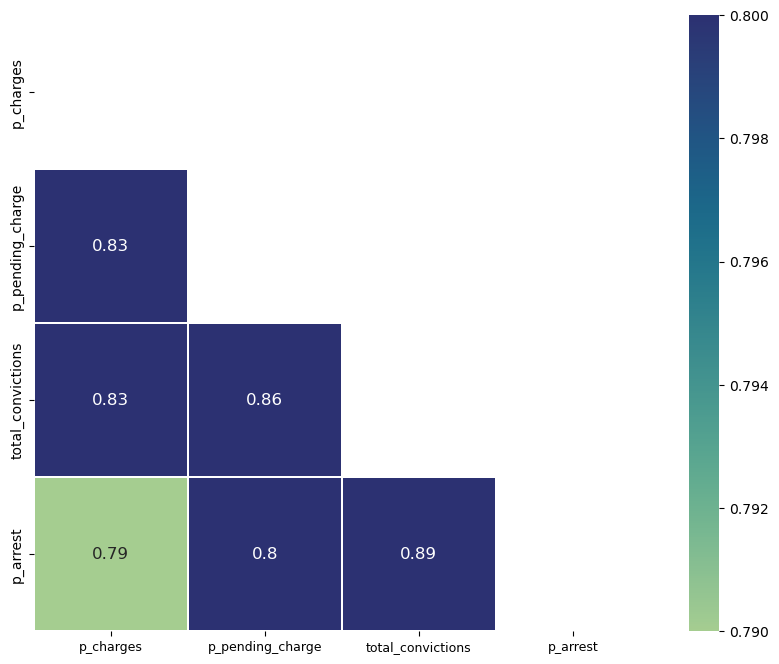

In [47]:
columns1 = ["p_charges","p_pending_charge","total_convictions","p_arrest"]
correlation_coefs = np.corrcoef(crime_data[columns1].values.T)
mask = np.triu(np.ones((4,4)))
f, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(correlation_coefs.round(2), mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='crest',
            linecolor="white", xticklabels=columns1, annot_kws={'size': 12}, yticklabels=columns1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=9)
plt.savefig('figures/heatmap2')
plt.show()

We also use histograms to observe the overall pattern and distribution of variables. Since all the histograms below are right-skewed, we need to transform these variables to create a more symmetrical distribution, which can improve model performance.

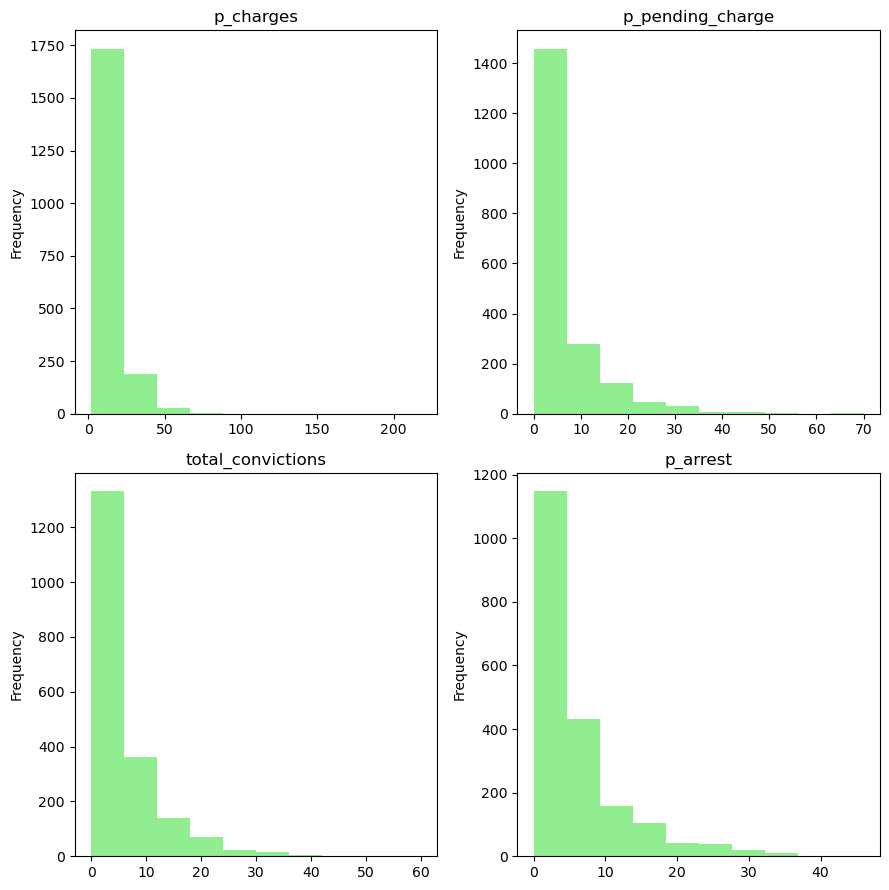

In [48]:
fig, axes = plt.subplots(figsize=(9,9), ncols=2, nrows=2)

hist_features1 = ["p_charges","p_pending_charge","total_convictions","p_arrest"]

for k, feature in enumerate(hist_features1):
    axes[k//2, k%2].set_title(feature)
    crime_data[feature].plot(kind="hist", ax=axes[k//2, k%2], color = 'lightgreen')
plt.tight_layout()
plt.savefig('figures/histogram2.png')
plt.show()

## Feature Engineer - try to understand the future engineer do, and try to add some more feature engine that is useful for random forest model

Feature engineering is the process of selecting, extracting, and transforming raw data into features that can be used to train a machine learning model. The goal of feature engineering is to improve the accuracy and efficiency of a model by creating meaningful representations of the input data.

#### split screening_date to year, month and day

Based on the findings in the book “IS CRIME SEASONAL” by Carolyn Rebecca Block, published in January 1984, it was observed that criminal activity tends to increase during the summer months, with the exception of December. To better understand this phenomenon and potentially identify any patterns or trends in criminal activity, we decided to perform an analysis on the feature screening_date.

In order to gain deeper insights into the data, we decided to split the feature screening_date into three separate components: year, month, and day. This allowed us to more effectively identify any correlations between the timing of criminal activity and other factors such as weather patterns or societal events.

The results of this data splitting revealed several interesting trends. For example, we found that criminal activity tended to be highest during the summer months, with a peak in the month of July. Additionally, we observed that certain types of crime were more prevalent during specific times of the year, such as property crimes being more common in the winter months.

In [49]:
screening_date = pd.to_datetime(crime_data.screening_date)
crime_data["year"] = screening_date.dt.year
crime_data["month"] = screening_date.dt.month
crime_data["day"] = screening_date.dt.day
crime_data.drop(labels='screening_date', axis=1, inplace=True)

In [50]:
crime_data.head(5)

,person_id,sex,race,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,p_felprop_viol,...,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month,year,month,day
0,1001,1,African-American,45,19,39,1,3,0,3,...,0,0,0,0,0,0,0,2014,2,3
1,101,1,Hispanic,42,26,9,1,0,0,0,...,0,1,0,0,0,0,0,2013,1,13
2,101,1,Hispanic,43,26,15,1,0,0,1,...,0,0,0,0,0,0,0,2014,2,2
3,1015,1,African-American,35,19,47,1,3,0,3,...,0,0,0,0,0,0,0,2014,1,22
4,1016,1,Other,27,18,11,1,2,0,3,...,1,1,0,0,0,1,1,2013,4,15


#### Convert string features to integer

The feature “race” in our dataset was initially stored as a string, which could cause issues when analyzing and modeling the data. To address this, we converted the “race” feature to an integer data type, where each unique race was assigned a specific number. The purpose of this conversion was to make the data more standardized and easier to process.

By converting the “race” feature to an integer, we were able to perform statistical analysis and machine learning algorithms more efficiently. This transformation allowed us to compare and contrast different races in a consistent and meaningful way. Furthermore, by using numerical values to represent the races, we were able to reduce the risk of data entry errors and enhance the accuracy of our analyses.

The resulting plots after the conversion of the “race” feature provide a visual representation of the distribution of each race in our dataset. These plots enable us to gain insights into the prevalence of each race in our data, as well as identify any potential biases or imbalances that may exist. Overall, the conversion of the “race” feature to an integer was a critical step in preparing our data for further analysis and modeling.

In [51]:
crime_data.race.head(20)

0     African-American
1             Hispanic
2             Hispanic
3     African-American
4                Other
5                Other
6             Hispanic
7     African-American
8             Hispanic
9     African-American
10    African-American
11    African-American
12    African-American
13           Caucasian
14    African-American
15    African-American
16    African-American
17    African-American
18    African-American
19           Caucasian
Name: race, dtype: object

In [52]:
race_dict = crime_data['race'].unique().tolist()
crime_data['race'] = crime_data['race'].apply(lambda x: race_dict.index(x))

In [53]:
crime_data.race.head(20)

0     0
1     1
2     1
3     0
4     2
5     2
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    3
14    0
15    0
16    0
17    0
18    0
19    3
Name: race, dtype: int64

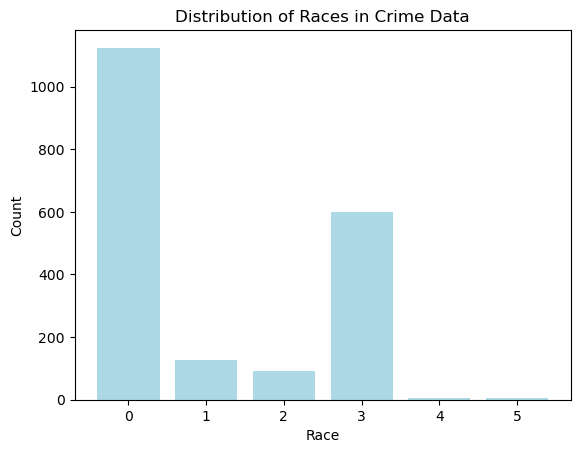

In [54]:
# Group the data by race and count the occurrences
race_count = crime_data.groupby('race').size()
# Plot the distribution of races using a bar chart
plt.bar(race_count.index, race_count.values, color = 'lightblue')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Races in Crime Data')
plt.savefig('figures/figure1.png')
plt.show()

#### Convert long tail distribution to normal distribution by log transformation.
During the exploratory data analysis phase, we noticed that some of our dataset’s features had a long-tail distribution. Long-tailed distributions can cause issues with statistical analysis and modeling, as they may violate the assumptions of normality and homoscedasticity. Therefore, to address this issue, we applied a log-transformation to these features.

The log-transformation is a common technique used to normalize long-tailed data and make it more suitable for analysis. By applying a logarithmic function to the data, we were able to compress the values of the long-tailed distribution and obtain a more normally distributed feature.

However, applying the log function to zero-valued data can cause errors, as the logarithmic function is undefined at zero. Therefore, we added a small constant of 1 to all features to ensure that there were no zero values in our dataset. This prevented any errors from occurring during the log- transformation process.

To illustrate the effects of the log-transformation, we created histograms of two example features before and after the transformation. The histograms show the distribution of the feature values before and after applying the log function, respectively. As seen in the histograms, the log-transformation effectively reduced the skewness of the distribution and made it more symmetric and normally distributed. This normalization will enable us to perform more accurate statistical analyses and develop better predictive models based on the transformed features.

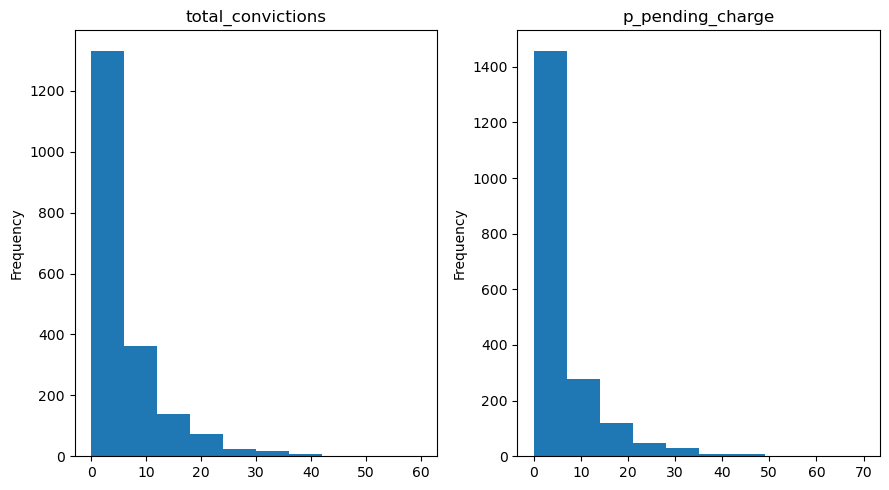

In [55]:
fig, axes = plt.subplots(figsize=(9,5),ncols=2, nrows=1)

#Figures before log trans
hist_features = ["total_convictions", "p_pending_charge"]
for k, feature in enumerate(hist_features):
    ax = axes[k]
    ax.set_title(feature)
    crime_data[feature].plot(kind="hist", ax=ax)
plt.tight_layout()
plt.savefig('figures/figure2.png')
plt.show()

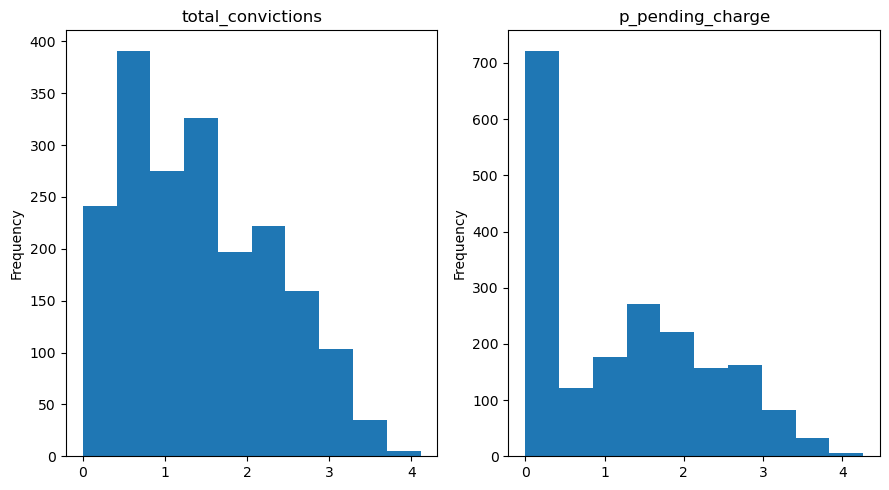

In [56]:
# figures after log transform
crime_data["total_convictions"] = np.log(crime_data["total_convictions"].values + 1)
crime_data["p_pending_charge"] = np.log(crime_data["p_pending_charge"].values + 1)

fig, axes = plt.subplots(figsize=(9, 5), ncols=2, nrows=1)

hist_features = [ "total_convictions", "p_pending_charge"]
for k, feature in enumerate(hist_features):
    ax = axes[k]
    ax.set_title(feature)
    crime_data[feature].plot(kind="hist", ax=ax)
plt.tight_layout()
plt.savefig('figures/figure3.png')
plt.show()

#### Remove features with low standard deviation

When working with machine learning models, it is important to identify and remove features that have little to no impact on the output or target variable. One way to do this is by analyzing the standard deviation of each feature in the dataset. Standard deviation is a measure of how spread out the data is from the mean value. If a feature has a small standard deviation, it means that the values are clustered closely around the mean, and there is not much variation in the data.

By computing the standard deviation of all features in our dataset, we were able to identify which features had small standard deviations. These features are often referred to as low-variance features. Low-variance features are barely separable and can lead to overfitting in machine learning models. Overfitting occurs when a model becomes too complex and captures the noise in the data rather than the underlying patterns, leading to poor performance on new data.

To address this issue, we chose to remove the low-variance features from our dataset before training machine learning models. By doing so, we were able to improve the accuracy and generalizability of our models, as well as reduce the risk of overfitting. This process of identifying and removing low- variance features is known as feature selection and is a crucial step in preparing data for machine learning.

In [57]:
label_columns = ["general_two_year", "general_six_month", "drug_two_year", "property_two_year", "misdemeanor_two_year",
                 "felony_two_year", "violent_two_year", "drug_six_month", "property_six_month", "misdemeanor_six_month",
                 "felony_six_month", "violent_six_month"]

features_columns = crime_data.columns.tolist()
x = utils.prepare_features(crime_data, label_columns, features_columns)

In [58]:
# #Original cell
# label_columns = ["general_two_year", "general_six_month", "drug_two_year", "property_two_year", "misdemeanor_two_year",
#                  "felony_two_year", "violent_two_year", "drug_six_month", "property_six_month", "misdemeanor_six_month",
#                  "felony_six_month", "violent_six_month"]
# drop_features = ["person_id"] + label_columns
# features_columns = crime_data.columns.tolist()
# for x in drop_features:
#     features_columns.remove(x)
# x = crime_data.loc[:, features_columns]

In [59]:
print(x.std())

sex                       0.334681
race                      1.379372
age_at_current_charge    11.008898
age_at_first_charge       8.868941
p_charges                11.223027
p_incarceration           0.477588
p_probation               1.481047
p_juv_fel_count           0.708095
p_felprop_viol            2.217787
p_murder                  0.174411
p_felassault              0.957249
p_misdeassault            1.014631
p_sex_offense             0.516139
p_weapon                  0.632346
p_fta_two_year            0.598511
p_fta_two_year_plus       0.098334
current_violence          0.499363
current_violence20        0.255402
p_pending_charge          1.100237
p_felony                  3.290550
p_misdemeanor             4.294165
p_violence                3.323527
total_convictions         0.904258
p_arrest                  6.246491
p_property                4.150365
p_traffic                 0.602952
p_drug                    3.691064
p_dui                     0.998764
p_domestic          

In [60]:
## choose top 35 features with higher sd
select_feature_num = np.argsort(x.std().values)[::-1][:35]
print(x.std())
select_feature = x.columns[select_feature_num]
drop_features = list(set(features_columns).difference(set(select_feature)))
print(drop_features)  # print removed features
x = x.loc[:, select_feature]

sex                       0.334681
race                      1.379372
age_at_current_charge    11.008898
age_at_first_charge       8.868941
p_charges                11.223027
p_incarceration           0.477588
p_probation               1.481047
p_juv_fel_count           0.708095
p_felprop_viol            2.217787
p_murder                  0.174411
p_felassault              0.957249
p_misdeassault            1.014631
p_sex_offense             0.516139
p_weapon                  0.632346
p_fta_two_year            0.598511
p_fta_two_year_plus       0.098334
current_violence          0.499363
current_violence20        0.255402
p_pending_charge          1.100237
p_felony                  3.290550
p_misdemeanor             4.294165
p_violence                3.323527
total_convictions         0.904258
p_arrest                  6.246491
p_property                4.150365
p_traffic                 0.602952
p_drug                    3.691064
p_dui                     0.998764
p_domestic          

In [61]:
print(x.std()) # sd of features keeped

p_charges                11.223027
age_at_current_charge    11.008898
age_at_first_charge       8.868941
day                       8.534939
p_arrest                  6.246491
p_misdemeanor             4.294165
p_property                4.150365
p_stealing                3.833058
p_drug                    3.691064
month                     3.678154
p_violence                3.323527
p_felony                  3.290550
p_felprop_viol            2.217787
p_trespass                1.800541
p_probation               1.481047
race                      1.379372
p_voyeurism               1.335258
p_pending_charge          1.100237
p_misdeassault            1.014631
p_dui                     0.998764
p_felassault              0.957249
total_convictions         0.904258
p_juv_fel_count           0.708095
p_weapon                  0.632346
p_traffic                 0.602952
p_fta_two_year            0.598511
p_sex_offense             0.516139
one_year                  0.500124
current_violence    

#### remove sparse features

Removing the sparse features was a crucial step in preparing our dataset for further analysis and modeling. In our dataset, some features contain mostly zero values, with only a small number of non-zero values. These sparse features can negatively impact the performance of our machine learning models and the interpretability of our analyses. Therefore, we decided to remove these sparse features from our dataset.

To identify the sparse features, we calculated the percentage of zero values for each feature and created a plot to visualize this information. Any feature with a percentage of zero values larger than 90% was considered too sparse and was removed from our dataset.

Based on this criterion, we identified five features that were too sparse: “p_voyeurism”, “p_juv_fel_count”, “p_traffic”, “p_fta_two_year”, and “p_sex_offense”. These features were removed from our dataset, leaving us with 30 features.

By removing the sparse features, we were able to reduce the dimensionality of our dataset, which can improve the performance of machine learning algorithms and reduce overfitting. Furthermore, by focusing on the features with more non-zero values, we can gain insights into the important factors that contribute to the outcome variable in our analysis.

In [62]:
feature_sparse_r = 0.9 # if the percentage of zeros is larger than 0.9 then remove.

# def remove_sparse_features(data, feature_r):
#     x = data
#     x_num = x.shape[0]
#     feature_num = x.shape[1]
#     feature_no_zero_num = np.sum([x == 0], 1)[0]
#     feature_list =  feature_no_zero_num / x_num
#     select_feature_sparse = x.columns[feature_list < feature_r]
#     drop_feature_sparse = x.columns[feature_list > feature_r]
#     x = x.loc[:, select_feature_sparse]
#     return feature_list, x, drop_feature_sparse

feature_sparse_r_list, x, drop_feature_sparse  = utils.remove_sparse_features(x, feature_sparse_r)
print(feature_sparse_r_list)
print(feature_sparse_r_list < feature_sparse_r)
print(drop_feature_sparse)

[0.00000000e+00 0.00000000e+00 5.11770727e-04 0.00000000e+00
 8.18833163e-03 2.04708291e-01 4.18116684e-01 4.77993859e-01
 4.19140225e-01 0.00000000e+00 4.12487206e-01 4.85158649e-01
 6.00818833e-01 6.71443193e-01 5.36335722e-01 5.75230297e-01
 9.97952917e-01 3.69498465e-01 6.00307062e-01 8.51074719e-01
 7.41555783e-01 1.23336745e-01 9.54452405e-01 8.98157625e-01
 9.26305015e-01 9.01740020e-01 9.89764585e-01 4.97952917e-01
 4.72364381e-01 6.48413511e-01 6.52507677e-01 2.28249744e-01
 0.00000000e+00 1.28454452e-01 1.13101331e-01]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
 False False False  True  True  True  True  True  True  True  True]
Index(['p_voyeurism', 'p_juv_fel_count', 'p_traffic', 'p_fta_two_year',
       'p_sex_offense'],
      dtype='object')


In [63]:
#Original cell

# x_num = x.shape[0]
# feature_num = x.shape[1]
# feature_no_zero_num = np.sum([x == 0], 1)[0]
# feature_sparse_r = 0.9 # if the percentage of zeros is larger than 0.9 then remove.
# feature_sparse_r_list =  feature_no_zero_num/x_num
# print(feature_sparse_r_list)
# print(feature_sparse_r_list < feature_sparse_r)
# # features kept
# select_feature_sparse = x.columns[feature_sparse_r_list < feature_sparse_r]
# # features removed
# drop_feature_sparse = x.columns[feature_sparse_r_list > feature_sparse_r]
# print(drop_feature_sparse)
# x = x.loc[:, select_feature_sparse]

#### Outliers detection

In data analysis, outliers are data points that deviate significantly from the rest of the data. These values can have a disproportionate effect on statistical measures such as the mean and standard deviation, and can therefore distort the analysis and modeling results. Hence, it is important to identify and handle outliers appropriately.
To address this, we performed a z-score analysis on our dataset to identify any outliers. Z-score analysis involves standardizing the data by subtracting the mean and dividing by the standard deviation. Any data point with a z-score greater than 3 is considered an outlier.

To handle these outliers, we chose to change their values to have a z-score of exactly 3. This approach is known as winsorizing, which involves capping the extreme values of the data to a predetermined value. By setting the z-score of outliers to 3, we are effectively limiting the effect of these values on the analysis and modeling results, while still preserving their relative position within the data.
The purpose of this action is to improve the accuracy and robustness of our data analysis and modeling. Outliers can skew the results of statistical measures, such as correlation coefficients and regression analyses, which can lead to incorrect conclusions and predictions. By handling outliers appropriately, we can ensure that our models are based on reliable and meaningful data.

Furthermore, identifying outliers and handling them appropriately is an important step in preparing the data for machine learning algorithms. Outliers can have a significant impact on the performance of machine learning models, as they can cause overfitting or underfitting, and lead to poor gener- alization. Therefore, removing or modifying outliers can improve the accuracy and generalization performance of the machine learning models.

In conclusion, identifying and handling outliers is an important step in data analysis and modeling. By capping the z-scores of outliers to 3, we are preserving the relative position of these data points while minimizing their impact on the analysis and modeling results. This helps to ensure that our models are based on reliable and meaningful data, and can improve their accuracy and generalization performance.

In [64]:
# find features with outliers
print(x.describe())
outlier_features_list = ["p_charges","p_arrest","p_misdemeanor",
                         "p_property","p_stealing","p_drug","p_violence","p_felony",
                         "p_felprop_viol","p_trespass","p_probation",
                         "p_misdeassault","p_dui","p_felassault","p_weapon"]



x = utils.remove_outliers(x, outlier_features_list)

         p_charges  age_at_current_charge  age_at_first_charge          day  \
count  1954.000000            1954.000000          1954.000000  1954.000000   
mean     11.228762              31.971853            23.956499    15.436540   
std      11.223027              11.008898             8.868941     8.534939   
min       2.000000              18.000000             0.000000     1.000000   
25%       4.000000              23.000000            18.000000     8.000000   
50%       8.000000              29.000000            20.000000    16.000000   
75%      14.000000              39.000000            27.000000    22.000000   
max     218.000000              69.000000            60.000000    31.000000   

          p_arrest  p_misdemeanor   p_property   p_stealing       p_drug  \
count  1954.000000    1954.000000  1954.000000  1954.000000  1954.000000   
mean      5.907881       3.303480     2.301433     1.961617     2.432446   
std       6.246491       4.294165     4.150365     3.833058 

In [65]:
# find features with outliers
# print(x.describe())
# outlier_features_list = ["p_charges","p_arrest","p_misdemeanor",
#                          "p_property","p_stealing","p_drug","p_violence","p_felony",
#                          "p_felprop_viol","p_trespass","p_probation",
#                          "p_misdeassault","p_dui","p_felassault","p_weapon"]
# # change the values of outliers.
# for feature in outlier_features_list:
#     feature_data = x[feature]
#     mean = x[feature].mean()
#     std = x[feature].std()
#     mean_3_std = mean + 3 * std
#     x.loc[x[feature] > mean_3_std, feature] = mean_3_std

In [66]:
x.describe()

,p_charges,age_at_current_charge,age_at_first_charge,day,p_arrest,p_misdemeanor,p_property,p_stealing,p_drug,month,...,total_convictions,p_weapon,one_year,current_violence,p_incarceration,six_month,three_year,year,sex,five_year
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,10.996687,31.971853,23.956499,15.436540,5.786629,3.205290,2.120191,1.788900,2.330484,5.126407,...,1.426610,0.141177,0.502047,0.527636,0.351586,0.347492,0.771750,2013.174514,0.871546,0.886899
std,9.619147,11.008898,8.868941,8.534939,5.781292,3.737095,3.186592,2.883842,3.242971,3.678154,...,0.904258,0.448368,0.500124,0.499363,0.477588,0.476296,0.419812,0.379648,0.334681,0.316798
min,2.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,0.000000,0.000000
25%,4.000000,23.000000,18.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000
50%,8.000000,29.000000,20.000000,16.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,...,1.386294,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000
75%,14.000000,39.000000,27.000000,22.000000,7.000000,4.000000,3.000000,2.000000,3.000000,9.000000,...,2.079442,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000
max,44.897844,69.000000,60.000000,31.000000,24.647354,16.185976,14.752527,13.460790,13.505639,12.000000,...,4.110874,2.066435,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,1.000000


## Models - Using Random Forest, determine the features that have the biggest influence on committing crime again

Random Forest model is a powerful tool for predicting the features that have the biggest influence on committing a crime again and testing assumptions related to age and prior criminal history. By identifying the most important predictors and their relationships with recidivism, we can develop targeted interventions and prevention strategies that address the underlying risk factors and reduce the likelihood of reoffending.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
import random

We first need performs a grid search over hyperparameters to find the best model for a random forest classifier.

In [68]:
 # set the seed for the random number generator to a fixed value
random.seed(123456)
# calculate the number of rows to use for training (70% of the data)
num = int(len(crime_data) * 0.7)
# define a grid of hyperparameters to search over
param_grid = {"n_estimators": [10,20,30,50,100], "max_depth": [1, 2, 3, 4, 5]} 
# get the length of the n_estimators and max_depth hyperparameter lists 
n_estimators_len = len(param_grid["n_estimators"])
max_depth = len(param_grid["max_depth"])
# create a KFold cross-validation object with 2 splits
cv = KFold(n_splits=2, shuffle=True, random_state=666)
# select the label column to predict
label = label_columns[0]
# split the data into training and testing sets
train_x, train_y = x.loc[:num, :].values, crime_data.loc[:num, label].values 
test_x, test_y = x.loc[num:, :].values, crime_data.loc[num:, label].values
# create a random forest classifier model
model = RandomForestClassifier()
# perform a grid search over the hyperparameters to find the best model
clf = GridSearchCV(estimator=model,
param_grid=param_grid, scoring='accuracy', cv=cv, return_train_score=True)
clf.fit(train_x, train_y)
# reshape the test scores into a 2D array
test_score = clf.cv_results_['mean_test_score'].reshape((n_estimators_len, max_depth))
print(test_score)

[[0.59429825 0.59576023 0.60160819 0.59283626 0.58991228]
 [0.59429825 0.59210526 0.60526316 0.59795322 0.6001462 ]
 [0.60526316 0.61111111 0.61038012 0.60818713 0.60818713]
 [0.5994152  0.60599415 0.60453216 0.60964912 0.60672515]
 [0.57894737 0.59868421 0.60745614 0.60745614 0.60380117]]


Then, we need to create a 3D visualization to visualize our hyperparameter selection that shows the relationship between the model’s per- formance (as measured by test_score) and different values of max_depth and n_estimators. By plotting the test_score on the z-axis and max_depth and n_estimators on the x and y axes, re- spectively, we can see how changing these hyperparameters affects the model’s performance. 
This can help us choose the best values of max_depth and n_estimators that balance model complexity and accuracy, and avoid overfitting or underfitting.

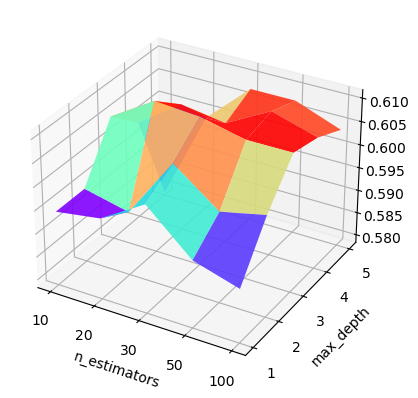

In [69]:
 # Create arrays for the x and y values
x1 = np.arange(start=1, stop=n_estimators_len +1, step=1) 
y1 = np.arange(start=1, stop=max_depth +1, step=1)
# Create a grid from the x and y arrays
X1, Y1 = np.meshgrid(x1, y1)
# Convert test_score to an array
Z1 = np.asarray(test_score)
# Create a new figure and axis for the 3D plot
fig = plt.figure()
ax = plt.axes(projection="3d")
# Plot the surface with the x, y, and z values

ax.plot_surface(X1, Y1, Z1, alpha=0.9, cstride=1, rstride=1, cmap='rainbow')
plt.xticks(x1, param_grid["n_estimators"])
plt.xlabel('n_estimators')
plt.yticks(y1, param_grid["max_depth"])
plt.ylabel('max_depth')
plt.savefig('figures/figure4.png')
plt.show()

Finally, we are going to train a Random Forest Classifier model on a dataset and evaluate its performance on a testing set.

In [70]:
 # Split the input data into training and testing sets
# `num` is the index up to which the training data is used
train_x, train_y = x.loc[:num, :].values, crime_data.loc[:num, label].values 
test_x, test_y = x.loc[num:, :].values, crime_data.loc[num:, label].values 
# Create a random forest classifier with 50 trees and a maximum depth of 4 
clf = RandomForestClassifier(n_estimators=50, max_depth= 4)
# Train the classifier on the training data
clf.fit(train_x, train_y)
# Predict the labels for the test data using the trained classifier 
test_pred = clf.predict(test_x)
# Calculate the accuracy of the predictions on the test data
test_acc = accuracy_score(test_y, test_pred)
print("Test Accuracy is: {}".format(round(test_acc, 4)))

Test Accuracy is: 0.6388


After training a machine learning model, it is often useful to determine the importance of the features used in the model. This can help to answer questions such as:
* Which features are most important in predicting the target variable?
* Which features can be safely ignored without significantly affecting the model’s performance?
* Are there any features that are highly correlated with each other and could be combined or removed to simplify the model?

By analyzing the feature importance outcome, we can identify the most important features that contribute to the model’s performance and potentially simplify the model by eliminating irrelevant or redundant features. We can also gain insights into the underlying patterns and relationships in the data, which can inform future data collection and analysis efforts.
In this example, the feature importance scores are shown in descending order, with the most important feature at the top of the list. The scores are normalized so that they sum to 1.0.

In [71]:
feature_names = x.columns[:-1] 
imporfeatures_rank = sorted(zip(feature_names, map(lambda x:round(x,4), clf.feature_importances_)),key=lambda x: x[1],reverse=True)

In [72]:
imporfeatures_rank

[('age_at_current_charge', 0.1418),
 ('p_misdemeanor', 0.1037),
 ('age_at_first_charge', 0.084),
 ('p_charges', 0.0708),
 ('p_pending_charge', 0.069),
 ('total_convictions', 0.0523),
 ('three_year', 0.0514),
 ('p_drug', 0.0407),
 ('p_arrest', 0.0386),
 ('day', 0.0354),
 ('one_year', 0.0342),
 ('p_dui', 0.0294),
 ('p_violence', 0.0254),
 ('race', 0.023),
 ('p_stealing', 0.0223),
 ('p_probation', 0.0188),
 ('p_property', 0.0165),
 ('month', 0.0162),
 ('p_felony', 0.0152),
 ('p_felassault', 0.0141),
 ('p_felprop_viol', 0.0138),
 ('p_incarceration', 0.0136),
 ('p_misdeassault', 0.0118),
 ('six_month', 0.0101),
 ('p_trespass', 0.0091),
 ('sex', 0.0081),
 ('current_violence', 0.0032),
 ('year', 0.0025),
 ('p_weapon', 0.0022)]

The outcome of our model predicted that age and number of prior misdemeanor are the features that will cause a person to commit another crime in the future. Higher number of prior misdemeanor will have higher chance to commit a crime again. And a younger age for a person committed his, her, or their first crime will have higher chance to commit a crime again in the future.

#### We will discussed about the results and interested findings further from our model in the main.ipynb